In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

W0703 20:24:28.298087 140348197648256 deprecation.py:323] From <ipython-input-2-8c515496db61>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0703 20:24:28.299706 140348197648256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0703 20:24:28.300915 140348197648256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0703 20:24:28.703421 140348197648256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0703 20:24:28.943489 140348197648256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


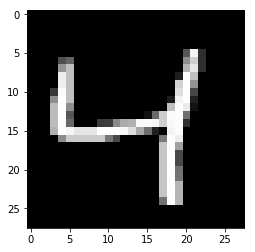

In [0]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [0]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8


### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

#######
def decoded_with_temp(T):
  return tf.nn.sigmoid(logits/T , name='decoded_with_tem')
######

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
alpha = 0.5

In [0]:
# inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
# targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')
enc_ = tf.placeholder(tf.float32, (None,4,4,8), name='enc')

### Encoder
conv1_S = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1_S = tf.layers.max_pooling2d(conv1_S, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2_S = tf.layers.conv2d(maxpool1_S, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2_S = tf.layers.max_pooling2d(conv2_S, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3_S = tf.layers.conv2d(maxpool2_S, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded_S = tf.layers.max_pooling2d(conv3_S, (2,2), (2,2), padding='same')
# Now 4x4x8


### Decoder
upsample1_S = tf.image.resize_nearest_neighbor(encoded_S, (7,7))
# Now 7x7x8
conv4_S = tf.layers.conv2d(upsample1_S, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2_S = tf.image.resize_nearest_neighbor(conv4_S, (14,14))
# Now 14x14x8
conv5_S = tf.layers.conv2d(upsample2_S, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3_S = tf.image.resize_nearest_neighbor(conv5_S, (28,28))
# Now 28x28x8
conv6_S = tf.layers.conv2d(upsample3_S, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits_S = tf.layers.conv2d(conv6_S, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded_S = tf.nn.sigmoid(logits_S, name='decoded')

#######
def decoded_with_temp_S(T):
  return tf.nn.sigmoid(logits_S/T , name='decoded_with_temp')
######

loss1 = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits_S)
loss2 = tf.losses.mean_squared_error(labels=enc_, predictions=encoded_S)
loss_S = loss1 + alpha*loss2
cost_S = tf.reduce_mean(loss_S)
opt_S = tf.train.AdamOptimizer(0.001).minimize(cost_S)


In [0]:
"""
Compressed autoencoder
"""
enc_ = tf.placeholder(tf.float32, (None,4,4,8), name='enc')
### Encoder
#input 28x28x1
convs_1 = tf.layers.conv2d(inputs_, 8, (5,5), strides=3, padding='valid', activation=tf.nn.relu)
#shape 8x8x8
maxpools_1 = tf.layers.max_pooling2d(convs_1, (2,2), (2,2), padding='same')
#shape 4x4x8


### Decoder
upsamples_1 = tf.image.resize_nearest_neighbor(maxpools_1, (8,8))
#shape 8x8x8
deconvs_1 = tf.layers.conv2d(upsamples_1, 8, (3,3), padding='same', activation=tf.nn.relu)
#shape 8x8x8
upsamples_2 = tf.image.resize_nearest_neighbor(deconvs_1, (28,28))
#shape 28x28x8
logits_S = tf.layers.conv2d(upsamples_2, 1, (3,3), padding='same', activation=None)
# logits_S.get_shape()


decoded_S = tf.nn.sigmoid(logits_S)


loss1 = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
loss2 = tf.losses.mean_squared_error(labels=enc_, predictions=maxpools_1)
loss_S = loss1 + alpha*loss2
cost_S = tf.reduce_mean(loss_S)
opt_S = tf.train.AdamOptimizer(0.001).minimize(cost_S)



NameError: ignored

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
logits.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [0]:
epochs = 10
batch_size = 64
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})
        if ii%100==0:
          print("Epoch: {}/{}...".format(ii, e),
                "Training loss: {:.4f}".format(batch_cost))

Epoch: 0/0... Training loss: 0.6993
Epoch: 100/0... Training loss: 0.2006
Epoch: 200/0... Training loss: 0.1716
Epoch: 300/0... Training loss: 0.1622
Epoch: 400/0... Training loss: 0.1460
Epoch: 500/0... Training loss: 0.1349
Epoch: 600/0... Training loss: 0.1318
Epoch: 700/0... Training loss: 0.1261
Epoch: 800/0... Training loss: 0.1351
Epoch: 900/0... Training loss: 0.1262
Epoch: 0/1... Training loss: 0.1304
Epoch: 100/1... Training loss: 0.1232
Epoch: 200/1... Training loss: 0.1170
Epoch: 300/1... Training loss: 0.1163
Epoch: 400/1... Training loss: 0.1149
Epoch: 500/1... Training loss: 0.1243
Epoch: 600/1... Training loss: 0.1211
Epoch: 700/1... Training loss: 0.1158
Epoch: 800/1... Training loss: 0.1147
Epoch: 900/1... Training loss: 0.1098
Epoch: 0/2... Training loss: 0.1062
Epoch: 100/2... Training loss: 0.1081
Epoch: 200/2... Training loss: 0.1139
Epoch: 300/2... Training loss: 0.1172
Epoch: 400/2... Training loss: 0.1178
Epoch: 500/2... Training loss: 0.1100
Epoch: 600/2... Tr

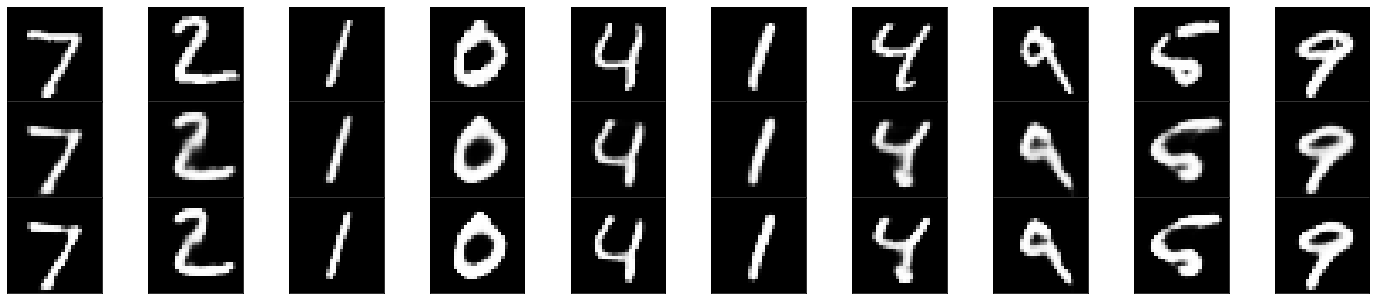

In [0]:
num = 10


fig, axes = plt.subplots(nrows=3, ncols=num, sharex=True, sharey=True, figsize=(2*num,4))

in_imgs = mnist.test.images[:num]

noise_factor = 0.001
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)
decoded_T = decoded_with_temp(0.6)
reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((num, 28, 28, 1))})
reconstructed_T = sess.run(decoded_T, feed_dict={inputs_: noisy_imgs.reshape((num, 28, 28, 1))})
for images, row in zip([noisy_imgs, reconstructed, reconstructed_T], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [0]:
epochs = 10
batch_size = 64
alpha = 2

for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        enc = sess.run([encoded], feed_dict={inputs_:imgs})
#         print(np.array(enc[0]).shape)
#         break
#     break
        batch_cost, _ = sess.run([cost_S, opt_S], feed_dict={inputs_: imgs,
                                                         targets_: imgs,
                                                             enc_:np.array(enc[0])})
        if ii%100==0:                                                 
          print("Epoch: {}/{}...".format(ii, e),
                "Training loss: {:.4f}".format(batch_cost))

Epoch: 0/0... Training loss: 2.5383
Epoch: 100/0... Training loss: 0.4246
Epoch: 200/0... Training loss: 0.3480
Epoch: 300/0... Training loss: 0.2809
Epoch: 400/0... Training loss: 0.2276
Epoch: 500/0... Training loss: 0.2064
Epoch: 600/0... Training loss: 0.1922
Epoch: 700/0... Training loss: 0.1802
Epoch: 800/0... Training loss: 0.1626
Epoch: 900/0... Training loss: 0.1691
Epoch: 0/1... Training loss: 0.1594
Epoch: 100/1... Training loss: 0.1590
Epoch: 200/1... Training loss: 0.1507
Epoch: 300/1... Training loss: 0.1409
Epoch: 400/1... Training loss: 0.1526
Epoch: 500/1... Training loss: 0.1445
Epoch: 600/1... Training loss: 0.1491
Epoch: 700/1... Training loss: 0.1471
Epoch: 800/1... Training loss: 0.1404
Epoch: 900/1... Training loss: 0.1351
Epoch: 0/2... Training loss: 0.1337
Epoch: 100/2... Training loss: 0.1316
Epoch: 200/2... Training loss: 0.1235
Epoch: 300/2... Training loss: 0.1301
Epoch: 400/2... Training loss: 0.1192
Epoch: 500/2... Training loss: 0.1208
Epoch: 600/2... Tr

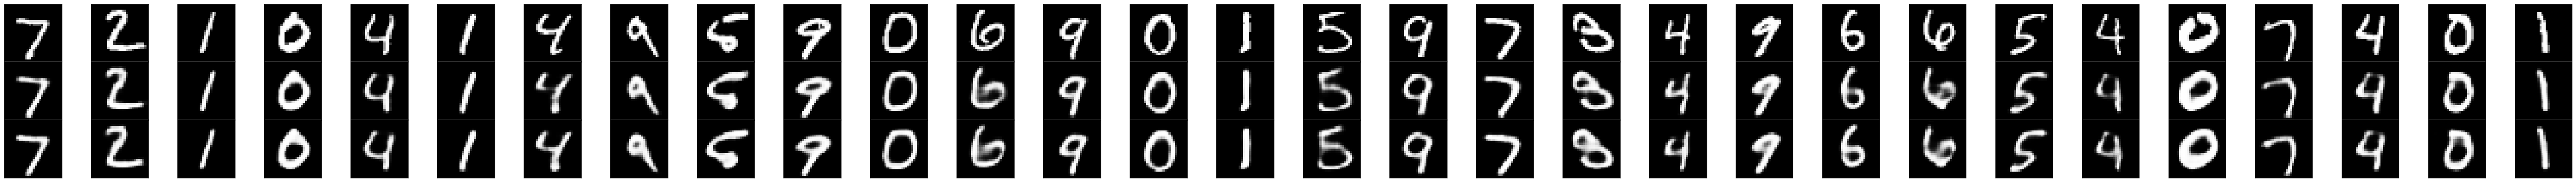

In [0]:
num = 30


fig, axes = plt.subplots(nrows=3, ncols=num, sharex=True, sharey=True, figsize=(2*num,4))

in_imgs = mnist.test.images[:num]

noise_factor = 0.001
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)
decoded_T = decoded_with_temp(1)
reconstructed = sess.run(decoded_S, feed_dict={inputs_: noisy_imgs.reshape((num, 28, 28, 1))})
reconstructed_T = sess.run(decoded_T, feed_dict={inputs_: noisy_imgs.reshape((num, 28, 28, 1))})
for images, row in zip([noisy_imgs, reconstructed, reconstructed_T], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [0]:
"""
Fashion MNIST
"""

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
len(train_images)

60000

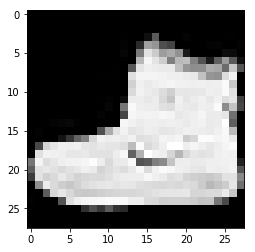

In [0]:
i = 0
plt.imshow(train_images[i].reshape((28,28)), cmap='Greys_r')

In [0]:
# batch = train_images[i*batch_size : (i+1)*batch_size]
# print(batch.shape)
train_images = np.expand_dims(train_images, axis=-1)
print(train_images.shape)

(60000, 28, 28, 1)


In [0]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28,1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28,1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8


### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

#######
def decoded_with_temp(T):
  return tf.nn.sigmoid(logits/T , name='decoded_with_tem')
######

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.0001).minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
epochs = 10
batch_size = 64
for e in range(epochs):
    i =0
    for ii in range(len(train_images)//batch_size):
        batch = train_images[i*batch_size : (i+1)*batch_size]
        i = i+1
#         imgs = np.expand_dims(batch, axis=-1)
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: batch,
                                                         targets_: batch})
        if ii%100==0:
          print("Epoch: {}/{}...".format(ii, e),
                "Training loss: {:.4f}".format(batch_cost))

NameError: ignored

In [0]:
"""
Student Network
"""


inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3),strides=2, padding='same', activation=tf.nn.relu)
print(conv1.get_shape())
# Now 14x14x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
print(maxpool1.get_shape())
# Now 7x7x16

conv3 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
print(conv3.get_shape())
# Now 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
print(encoded.get_shape())
# Now 4x4x8




### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# print(upsample1.get_shape())
# Now 7x7x8
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
print(conv4.get_shape())
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# print(upsample2.get_shape())
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2, 16, (3,3), padding='same', activation=tf.nn.relu)
print(conv5.get_shape())

# Now 14x14x16
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# print(upsample3.get_shape())

# # Now 28x28x16
# conv6 = tf.layers.conv2d(upsample3, 1, (3,3), padding='same', activation=None)
# print(conv6.get_shape())

# Now 28x28x1

logits = tf.layers.conv2d(upsample3, 1, (3,3), padding='same', activation=None)
print(logits.get_shape())
#Now 28x28x1

# decoded = tf.nn.sigmoid(logits, name='decoded')

#######
def decoded_with_temp(T):
  return tf.nn.sigmoid(logits/T , name='decoded_with_tem')
######

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost